# Predicting Wine Quality Based on Chemical Properties

**Introduction**:
The objective of this project is to predict the quality of wine using its chemical properties. The dataset contains physicochemical tests and quality ratings for various wines. This problem is a **regression problem**, as the target variable is a continuous quality score ranging from 0 to 10. Understanding the factors that contribute to wine quality can help winemakers improve their products and can provide consumers with valuable information about the attributes of high-quality wines.

## Problem Definition
**Problem Statement**: Given a set of chemical properties of wine (e.g., acidity, alcohol content), the goal is to predict the wine quality on a scale of 0-10.

**Target Variable**: `quality`

**Features**:
- Fixed acidity
- Volatile acidity
- Citric acid
- Residual sugar
- Chlorides
- Free sulfur dioxide
- Total sulfur dioxide
- Density
- pH
- Sulphates
- Alcohol

## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from xgboost import XGBClassifier

## Load dataset

In [2]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=';')
print("Dataset Loaded: \n", data.head())

Dataset Loaded: 
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2 

## EDA on dataset


Data Description:
        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000          

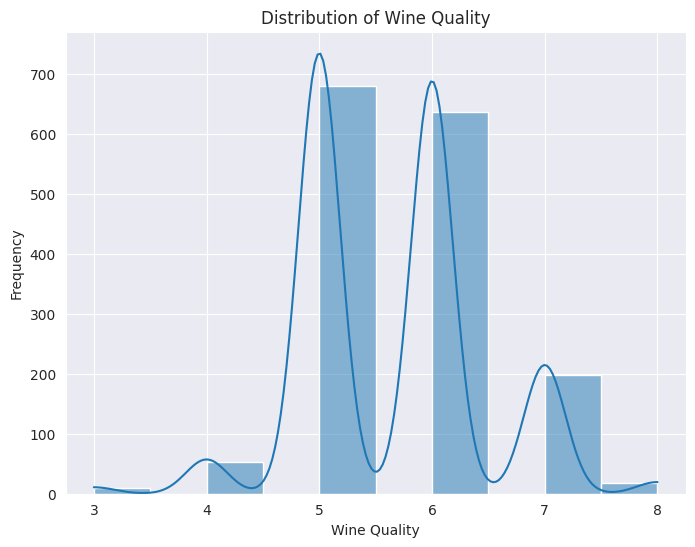

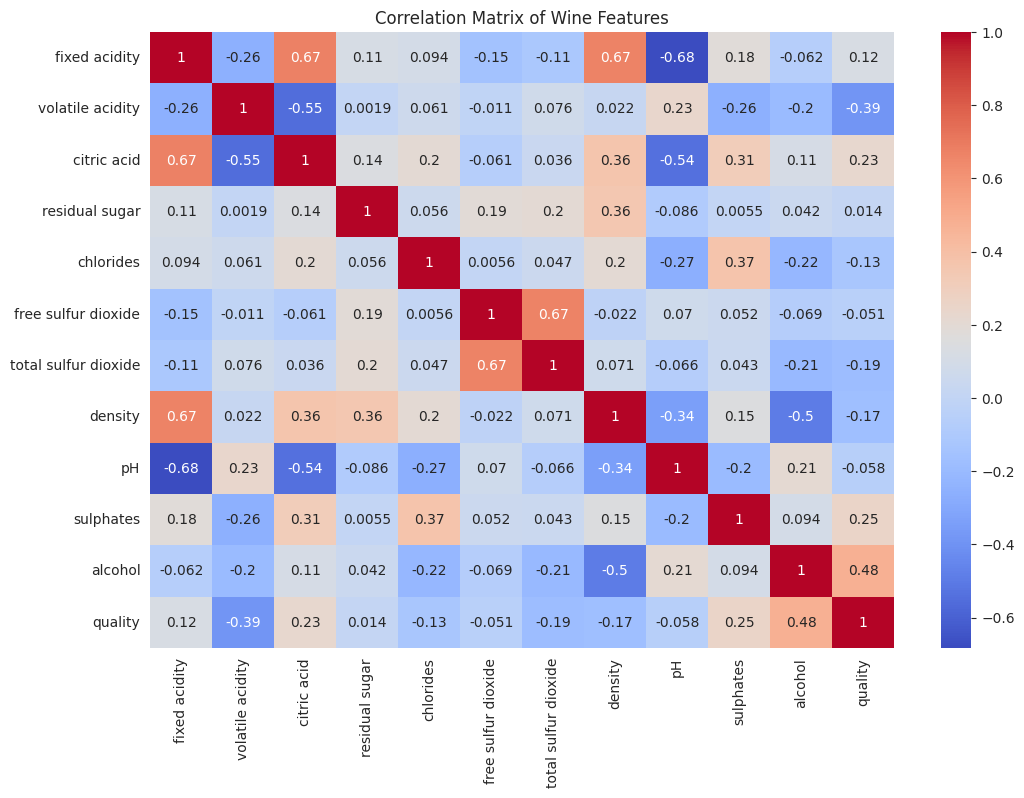

In [3]:
print("\nData Description:\n", data.describe())
print("\nMissing Values:\n", data.isnull().sum())

# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(data['quality'], bins=10, kde=True)
plt.title('Distribution of Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Frequency')
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Wine Features')
plt.show()

## Preprocess the data and convert the target variable to a categorical class

In [4]:
data['quality_label'] = data['quality'].apply(lambda x: 'Low' if x <= 5 else ('Medium' if x <= 7 else 'High'))
X = data.drop(['quality', 'quality_label'], axis=1)
y = data['quality_label']

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Handle class imbalance with SMOTE and SMOTE-Tomek Links

In [5]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("\nClass distribution before SMOTE:", y_train.value_counts())
print("Class distribution after SMOTE:\n", pd.Series(y_train_smote).value_counts())

smote_tomek = SMOTETomek(random_state=42)
X_train_smote_tomek, y_train_smote_tomek = smote_tomek.fit_resample(X_train, y_train)
print("Class distribution after SMOTE-Tomek:\n", pd.Series(y_train_smote_tomek).value_counts())


Class distribution before SMOTE: quality_label
Medium    663
Low       603
High       13
Name: count, dtype: int64
Class distribution after SMOTE:
 quality_label
Medium    663
Low       663
High      663
Name: count, dtype: int64
Class distribution after SMOTE-Tomek:
 quality_label
High      663
Medium    621
Low       621
Name: count, dtype: int64


## Train and evaluate models using Random Forest and Logistic Regression

In [6]:
# Random Forest Classifier with SMOTE data
rf_classifier_smote = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_classifier_smote.fit(X_train_smote, y_train_smote)
y_pred_rf_smote = rf_classifier_smote.predict(X_test)

# Calculate metrics
accuracy_rf_smote = accuracy_score(y_test, y_pred_rf_smote)
precision_rf_smote = precision_score(y_test, y_pred_rf_smote, average='weighted')
recall_rf_smote = recall_score(y_test, y_pred_rf_smote, average='weighted')
f1_rf_smote = f1_score(y_test, y_pred_rf_smote, average='weighted')

print("\nRandom Forest Classifier Report (after SMOTE):")
print("Accuracy:", accuracy_rf_smote)
print("Precision:", precision_rf_smote)
print("Recall:", recall_rf_smote)
print("F1-Score:", f1_rf_smote)
print("Confusion Matrix (after SMOTE):\n", confusion_matrix(y_test, y_pred_rf_smote))

# Logistic Regression with SMOTE data
lr_classifier_smote = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
lr_classifier_smote.fit(X_train_smote, y_train_smote)
y_pred_lr_smote = lr_classifier_smote.predict(X_test)

# Calculate metrics
accuracy_lr_smote = accuracy_score(y_test, y_pred_lr_smote)
precision_lr_smote = precision_score(y_test, y_pred_lr_smote, average='weighted')
recall_lr_smote = recall_score(y_test, y_pred_lr_smote, average='weighted')
f1_lr_smote = f1_score(y_test, y_pred_lr_smote, average='weighted')

print("\nLogistic Regression Report (after SMOTE):")
print("Accuracy:", accuracy_lr_smote)
print("Precision:", precision_lr_smote)
print("Recall:", recall_lr_smote)
print("F1-Score:", f1_lr_smote)
print("Confusion Matrix (after SMOTE):\n", confusion_matrix(y_test, y_pred_lr_smote))


Random Forest Classifier Report (after SMOTE):
Accuracy: 0.7875
Precision: 0.785446716357776
Recall: 0.7875
F1-Score: 0.7863080888906897
Confusion Matrix (after SMOTE):
 [[  0   0   5]
 [  0 114  27]
 [  4  32 138]]

Logistic Regression Report (after SMOTE):
Accuracy: 0.615625
Precision: 0.7213290111137989
Recall: 0.615625
F1-Score: 0.6411491135015758
Confusion Matrix (after SMOTE):
 [[  5   0   0]
 [  7 110  24]
 [ 40  52  82]]


## Feature Importance using Random Forest


Feature Importance from Random Forest:
                  Feature  Importance
10               alcohol    0.188114
9              sulphates    0.153104
4              chlorides    0.117567
1       volatile acidity    0.108835
6   total sulfur dioxide    0.081442
7                density    0.068804
2            citric acid    0.068764
5    free sulfur dioxide    0.059136
0          fixed acidity    0.056988
8                     pH    0.055558
3         residual sugar    0.041686
Random Forest Classifier Report (Feature Importance):
Accuracy: 0.7875
Precision: 0.785446716357776
Recall: 0.7875
F1-Score: 0.7863080888906897
Confusion Matrix:
 [[  0   0   5]
 [  0 114  27]
 [  4  32 138]]


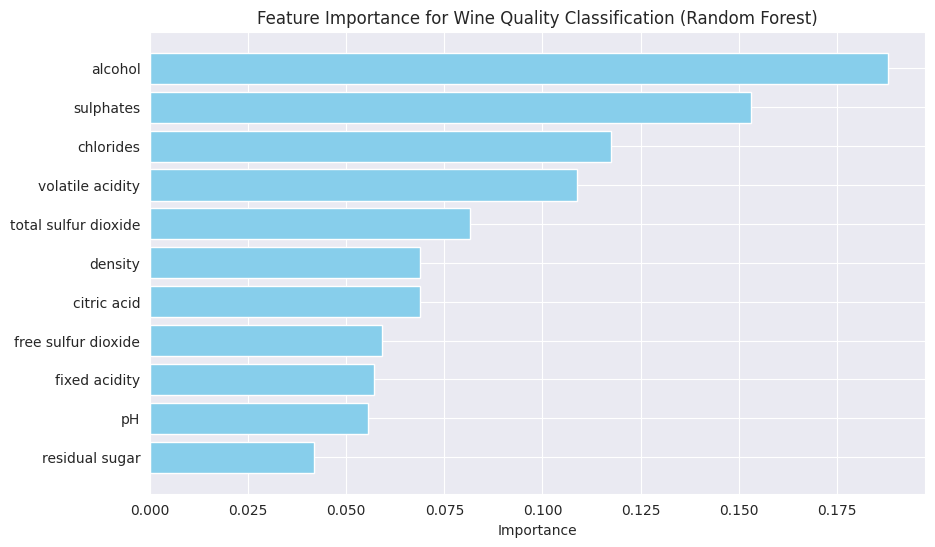

In [7]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train_smote, y_train_smote)
feature_importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Calculate metrics for Random Forest
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("\nFeature Importance from Random Forest:\n", importance_df)
print("Random Forest Classifier Report (Feature Importance):")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-Score:", f1_rf)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance for Wine Quality Classification (Random Forest)')
plt.gca().invert_yaxis()
plt.show()

## Recursive Feature Elimination (RFE) with Logistic Regression

In [8]:
lr = LogisticRegression(random_state=42, class_weight='balanced')
rfe = RFE(estimator=lr, n_features_to_select=5)
rfe.fit(X_train_smote, y_train_smote)
selected_features = X.columns[rfe.support_]
print("\nSelected Features from RFE:\n", selected_features)

# Create a new dataset with only the selected features from RFE
X_train_selected = X_train_smote[:, rfe.support_]
X_test_selected = X_test[:, rfe.support_]

# Train a new Random Forest model on the selected features
rf_selected = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_selected.fit(X_train_selected, y_train_smote)
y_pred_rf_selected = rf_selected.predict(X_test_selected)

# Calculate metrics
accuracy_rf_selected = accuracy_score(y_test, y_pred_rf_selected)
precision_rf_selected = precision_score(y_test, y_pred_rf_selected, average='weighted')
recall_rf_selected = recall_score(y_test, y_pred_rf_selected, average='weighted')
f1_rf_selected = f1_score(y_test, y_pred_rf_selected, average='weighted')

print("\nRandom Forest Classifier Report (with Selected Features):")
print("Accuracy:", accuracy_rf_selected)
print("Precision:", precision_rf_selected)
print("Recall:", recall_rf_selected)
print("F1-Score:", f1_rf_selected)
print("Confusion Matrix (with Selected Features):\n", confusion_matrix(y_test, y_pred_rf_selected))


Selected Features from RFE:
 Index(['chlorides', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol'], dtype='object')

Random Forest Classifier Report (with Selected Features):
Accuracy: 0.784375
Precision: 0.7858238636363637
Recall: 0.784375
F1-Score: 0.7844605305172886
Confusion Matrix (with Selected Features):
 [[  1   0   4]
 [  0 115  26]
 [  4  35 135]]


## Hyperparameter Tuning for Gradient Boosting Classifier

In [9]:
param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
gb_classifier = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_smote_tomek, y_train_smote_tomek)
best_gb_model = grid_search.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)

# Calculate metrics
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')

print("\nBest Gradient Boosting Parameters:", grid_search.best_params_)
print("Gradient Boosting Classifier Report:")
print("Accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1-Score:", f1_gb)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))


Best Gradient Boosting Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100}
Gradient Boosting Classifier Report:
Accuracy: 0.7625
Precision: 0.7626415372418279
Recall: 0.7625
F1-Score: 0.7625398162093951
Confusion Matrix:
 [[  0   0   5]
 [  0 109  32]
 [  5  34 135]]


## Train and Evaluate XGBoost Model

In [10]:
# Encode labels for XGBoost compatibility
label_encoder = LabelEncoder()
y_train_smote_tomek_encoded = label_encoder.fit_transform(y_train_smote_tomek)
y_test_encoded = label_encoder.transform(y_test)

# Define the XGBoost classifier
xgb_classifier = XGBClassifier(objective='multi:softmax', eval_metric='mlogloss', random_state=42)

# Perform grid search with cross-validation
grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(X_train_smote_tomek, y_train_smote_tomek_encoded)

# Obtain the best model
best_xgb_model = grid_search_xgb.best_estimator_

# Predict using the test set
y_pred_xgb_encoded = best_xgb_model.predict(X_test)
y_pred_xgb = label_encoder.inverse_transform(y_pred_xgb_encoded)

# Calculate metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

# Display results
print("\nBest XGBoost Parameters:", grid_search_xgb.best_params_)
print("XGBoost Classifier Report:")
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1-Score:", f1_xgb)
print("Confusion Matrix (XGBoost):\n", confusion_matrix(y_test, y_pred_xgb))


Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
XGBoost Classifier Report:
Accuracy: 0.790625
Precision: 0.7947610445912469
Recall: 0.790625
F1-Score: 0.7926105251845167
Confusion Matrix (XGBoost):
 [[  1   0   4]
 [  0 112  29]
 [  6  28 140]]


## Compare Models

In [11]:
# Create a comparison DataFrame with all metrics
comparison_df = pd.DataFrame({
    'Model': [
        'Random Forest (Original)',
        'Random Forest (Selected Features)',
        'Gradient Boosting',
        'XGBoost (SMOTE-Tomek)'
    ],
    'Accuracy': [
        accuracy_rf_smote,
        accuracy_rf_selected,
        accuracy_gb,
        accuracy_xgb
    ],
    'Precision': [
        precision_rf_smote,
        precision_rf_selected,
        precision_gb,
        precision_xgb
    ],
    'Recall': [
        recall_rf_smote,
        recall_rf_selected,
        recall_gb,
        recall_xgb
    ],
    'F1-Score': [
        f1_rf_smote,
        f1_rf_selected,
        f1_gb,
        f1_xgb
    ]
})

# Print the model comparison
print("\nModel Comparison After XGBoost and Advanced Balancing:\n", comparison_df)


Model Comparison After XGBoost and Advanced Balancing:
                                Model  Accuracy  Precision    Recall  F1-Score
0           Random Forest (Original)  0.787500   0.785447  0.787500  0.786308
1  Random Forest (Selected Features)  0.784375   0.785824  0.784375  0.784461
2                  Gradient Boosting  0.762500   0.762642  0.762500  0.762540
3              XGBoost (SMOTE-Tomek)  0.790625   0.794761  0.790625  0.792611


## Visualization for Model Comparison

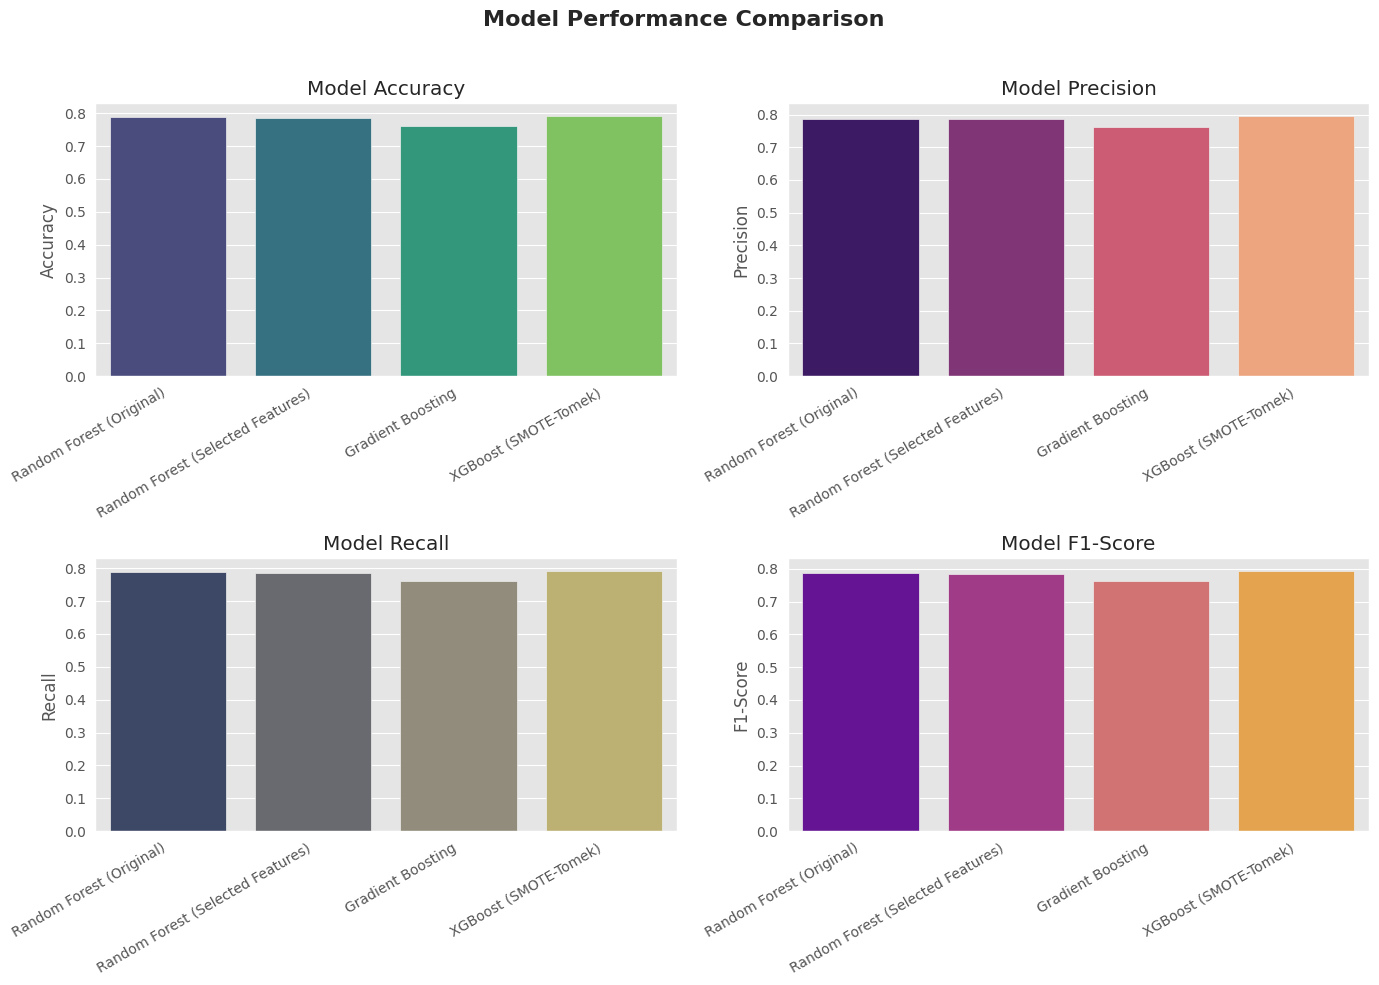

In [15]:
plt.style.use('ggplot')
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

# Accuracy Plot
sns.barplot(x='Model', y='Accuracy', hue='Model', data=comparison_df, ax=axes[0, 0], dodge=False, palette='viridis')
axes[0, 0].set_title('Model Accuracy')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Accuracy')

# Precision Plot
sns.barplot(x='Model', y='Precision', hue='Model', data=comparison_df, ax=axes[0, 1], dodge=False, palette='magma')
axes[0, 1].set_title('Model Precision')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('Precision')

# Recall Plot
sns.barplot(x='Model', y='Recall', hue='Model', data=comparison_df, ax=axes[1, 0], dodge=False, palette='cividis')
axes[1, 0].set_title('Model Recall')
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('Recall')

# F1-Score Plot
sns.barplot(x='Model', y='F1-Score', hue='Model', data=comparison_df, ax=axes[1, 1], dodge=False, palette='plasma')
axes[1, 1].set_title('Model F1-Score')
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('F1-Score')

for ax in axes.flat:
    ax.set_xticks(range(len(comparison_df['Model'])))
    ax.set_xticklabels(comparison_df['Model'], rotation=30, ha='right')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Final Model Evaluation and Performance Analysis

Based on the comparison of four models — **Random Forest (Original)**, **Random Forest (Selected Features)**, **Gradient Boosting**, and **XGBoost (SMOTE-Tomek)** — we observed the following results:

- **XGBoost (SMOTE-Tomek)** achieved the highest accuracy (`0.7906`), precision (`0.7948`), recall (`0.7906`), and F1-score (`0.7926`). This indicates that XGBoost, when combined with SMOTE-Tomek for handling class imbalance, was the best-performing model among the four.
- **Random Forest** models performed very similarly in terms of accuracy and F1-score but slightly lagged behind XGBoost.
- **Gradient Boosting**, while still performing reasonably well, had the lowest scores among the models.

The visualizations below provide a clear comparison of these metrics for all the models.


### Why XGBoost Outperformed the Other Models

XGBoost demonstrated superior performance in this project for several reasons:

1. **Handling of Imbalanced Data**: The use of SMOTE-Tomek for resampling before feeding data into XGBoost helped to balance the class distribution. This ensured that the model was not biased towards the majority class.

2. **Ability to Capture Complex Patterns**: XGBoost uses an ensemble of decision trees that are capable of capturing complex relationships between the features and the target variable, making it well-suited for high-dimensional data.

3. **Regularization and Optimization**: XGBoost applies both L1 and L2 regularization, which helps reduce overfitting and improves generalization. Its in-built tree pruning mechanism optimizes the model's performance further.

4. **Efficient Use of Computational Resources**: XGBoost is designed for parallel execution and uses an efficient implementation of gradient boosting, which allows it to train faster and make use of resources more efficiently compared to other tree-based models.

Overall, XGBoost’s robustness and efficiency, combined with advanced handling of imbalanced classes using SMOTE-Tomek, contributed to its superior performance in this wine quality classification project.
